# This notebook illustrates Fourier analysis of y(x)

### Work in a pylab session: clean, basic tools

In [1]:
# This magic line loads numpy, scipy, matplotlib. 
# add the word inline to put figures inline
%pylab inline

#plt.xkcd();

Populating the interactive namespace from numpy and matplotlib


## Experiment with specifying y(x)...

In [22]:
# 32 values for clarity of plot discreteness 
x = arange(32)/32. *2*pi

# wavenumbers 3-7, with amplitude 2 in #3-sine components, and a mean 
compose='y = 2*sin(3*x) - cos(4*x) + sin(5*x) - sin(6*x) + sin(7*x) + 1'
exec(compose)

# A square wave
#y = sin(5*x) > 0

# A sawooth wave
#x = arange(64)
#y = x % 60

# An isolated boxcar
#y = x<30

# y = detrend(y) # this subtracts the mean

## Plot the series, two copies for clarity 

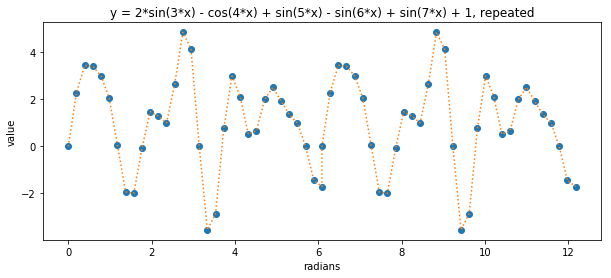

In [23]:
# Plot it, repeated since Fourier analysis assumes periodicity 
xx = concatenate((x, x+max(x)))
yy = concatenate((y, y       ))

# Plot the discrete values as dots '.', 
# connected by a dotted line ':'
figsize(10,4)

plot(xx,yy,'o', label='raw'); xlabel('radians'); ylabel('value')
plot(xx,yy,':', label='raw')
title(compose+', repeated');

## SFT = Slow Fourier Transform (illustration)

Text(0.5,0,'radians')

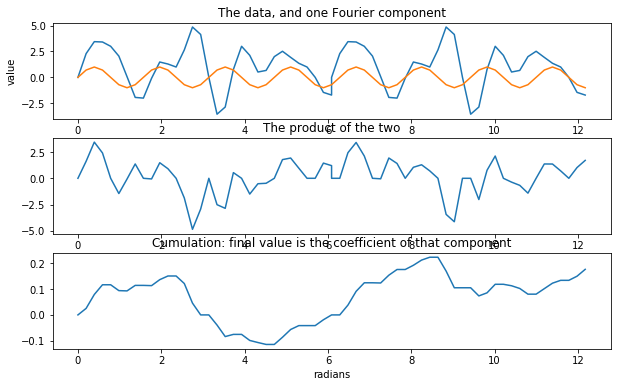

In [24]:
# Slow Fourier transform: mean of product of sin() and data
figsize(10,6)

subplot(311)
plot(xx,yy)
title('The data, and one Fourier component')
plot(xx, sin(4*xx)); ylabel('value')

subplot(312)
product = yy * sin(4*xx)
plot(xx, product)
title('The product of the two')

subplot(313)
plot(xx, cumsum(product)/len(product))
title('Cumulation: final value is the coefficient of that component'); xlabel('radians')

## Make the complex spectrum, using fft
...normalizing by input series length, since it makes no sense for the *values* of the spectrum in the plots to depend on sampling rate (and thus on N)

In [25]:
N = len(y) 
spec = fft.fft(y) /N

# Unpack in all the usual ways: real (cos) and imaginary (sin)
specr = real(spec)
speci = imag(spec)

# Unpack in all the usual ways: amplitude and phase
ampli = abs(spec)
phase = angle(spec)

## Plot real and imaginary parts
Should be symmetric since the input is real. But the mean of the data is in wavenumber 0 of the real (cosine) part.

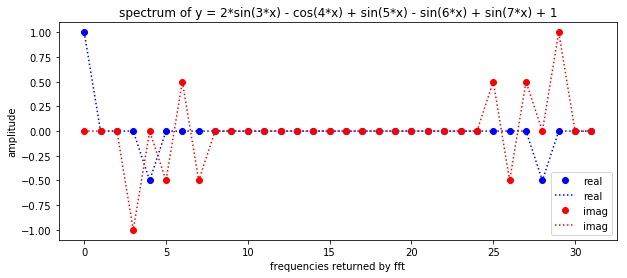

In [26]:
# Plot the real (blue) and imaginary (red) parts
figsize(10,4)

plot(specr,'bo', label='real')
plot(specr,'b:', label='real') # lines connecting DISCRETE points 
plot(speci,'ro', label='imag')
plot(speci,'r:', label='imag') # lines are meaningless; for clarity
title('spectrum of '+compose)
xlabel('frequencies returned by fft'); ylabel('amplitude')
legend(loc='best');

### Plot amplitude or *power* (amplitude squared) and phase
Should be symmetric since the input is real. 
But the mean of the data is in wavenumber 0, in the real (cosine) part.

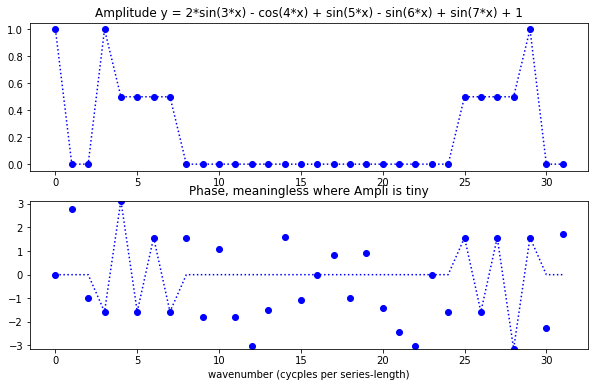

In [27]:
# Plot the amplitude and phase

figsize(10,6)
subplot(211)
plot(ampli,'bo'); 
plot(ampli,'b:'); 
title('Amplitude '+compose)

subplot(212)
plot(phase,'bo')
plot(phase*(ampli > 1e-3),'b:')
title('Phase, meaningless where Ampli is tiny')
xlabel('wavenumber (cycples per series-length)');
ylim([-pi,pi]);

### Tidy up the symmetry and labels for a nicer Power spectrum plot

In [28]:
# TAKE JUST THE LEFT HALF OF THE SYMMETRIC SPECTRUM
Wavenumbers = arange(N/2)

# BUT DOUBLE THE VALUEs, other than wavenumber 0
Amp2 = ampli[0:int(N/2)] *2.
Amp2[0] = 0

# Now power spectrum density is 1/2 amplitude squared since var(sin(x))=var(cos(x)) = 1/2
Power = (Amp2**2) /2.

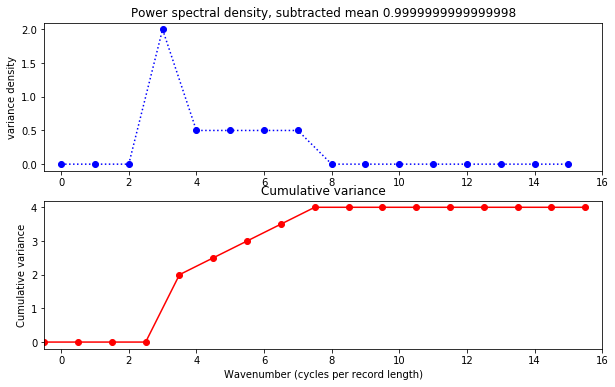

In [29]:
# Power spectral density plot
figsize(10,6)

subplot(211)
plot(Wavenumbers,Power ,'bo')
plot(Wavenumbers,Power ,'b:')
xlim([-0.5,N/2])

title('Power spectral density, subtracted mean '+str(ampli[0]))
ylabel('variance density');

# Cumulative power graph: offset x axis by half a wavenumber
CumWavenum  = concatenate(([-0.5],arange(N/2)+0.5))
CumVar      = concatenate(([0],   cumsum(Power) ))
                     
subplot(212)
plot(CumWavenum,CumVar,'ro')
plot(CumWavenum,CumVar,'r')
xlim([-0.5,N/2])

title('Cumulative variance')
xlabel('Wavenumber (cycles per record length)')
ylabel('Cumulative variance');

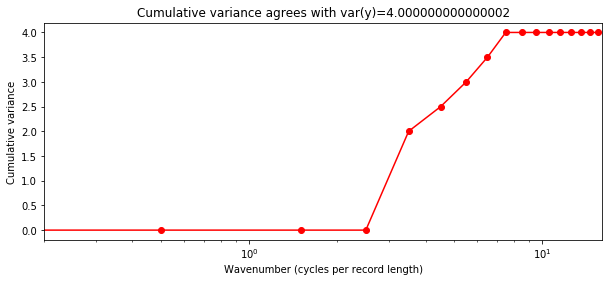

In [30]:
figsize(10,4)

semilogx(CumWavenum,CumVar,'ro')
semilogx(CumWavenum,CumVar,'r')
xlim([0.2 ,N/2])
title('Cumulative variance agrees with var(y)='+ str(var(y)))
xlabel('Wavenumber (cycles per record length)')
ylabel('Cumulative variance');

In [31]:
# mean square and variance differ if the mean is not zero 
print( mean(y**2) )
print( var(y) )

5.000000000000002
4.000000000000002


## Reconstruct (synthesize) data by meddling with phase. 
#### Notice that 1j is *i* in Python 

In [32]:
# Edit the spectrum's phase and amplitude:
syn_ampli = ampli

# Phase=0 gives the autocorrelation function
syn_phase = phase*0; explabel = 'phase=0, cosines pile up at 0 & 2pi'

# Phase = rand() makes synthetic data
# syn_phase = 2*pi*rand( len(phase) ); explabel = 'random phases'

### Reconstruct the complex spectrum and ifft it, from edited amplitude and phase

In [33]:
# Build the synthetic spectrum from real and imaginary parts
syn_spec =(    syn_ampli*cos(syn_phase)   #real part
         + 1j* syn_ampli*sin(syn_phase) ) #imag part

# Synthesize back into physical space (time domain) with ifft: 
# First, we have to rescale by N = len(y). 
# And there is a near-zero imaginary part; strip it off with real()
syn_data = real( ifft(syn_spec)*N )

### Display the synthetic data (autocorrelation if phase=0) on the raw data

Text(0.5,1,'y = 2*sin(3*x) - cos(4*x) + sin(5*x) - sin(6*x) + sin(7*x) + 1')

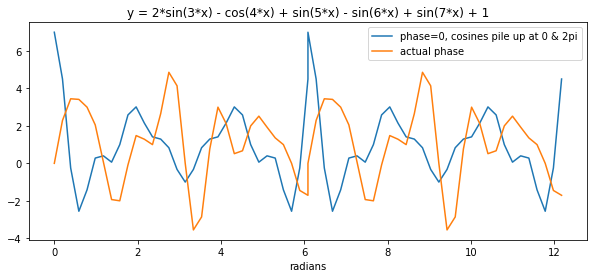

In [34]:
plot(xx,tile(syn_data,2), label=explabel)
plot(xx,yy, label='actual phase')
legend(loc='best')
xlabel('radians')
title(compose)